In [ ]:
!pip install darts

     |████████████████████████████████| 370 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 80.5 MB/s 
     |████████████████████████████████| 11.2 MB 55.4 MB/s 
     |████████████████████████████████| 793 kB 57.0 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
     |████████████████████████████████| 172 kB 97.9 MB/s 
     |████████████████████████████████| 584 kB 62.9 MB/s 
     |████████████████████████████████| 65 kB 5.5 MB/s 
     |████████████████████████████████| 1.4 MB 63.4 MB/s 
     |████████████████████████████████| 381 kB 69.7 MB/s 
     |████████████████████████████████| 930 kB 68.1 MB/s 
     |████████████████████████████████| 49 kB 7.4 MB/s 
     |████████████████████████████████| 45 kB 3.9 MB/s 
     |████████████████████████████████| 136 kB 90.2 MB/s 
     |████████████████████████████████| 409 kB 74.7 MB/s 
     |████████████████████████████████| 596 kB 70.7 MB/s 
     |████████████████████████████████| 1.1 MB 83.2 MB/s 
     |████████████████

In [ ]:
!pip install pyyaml==5.4.1

     |████████████████████████████████| 636 kB 5.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Single series

In [ ]:
from darts.models import ARIMA

In [ ]:
singledata=TimeSeries.from_csv('E5_1.csv',time_col='year')

In [ ]:
model_arima=ARIMA()

In [ ]:
model_arima.fit(singledata)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
Arima_predic=model_arima.predict(5)

In [ ]:
from darts.models import NBEATSModel

In [ ]:
N_Beatsm=NBEATSModel(input_chunk_length=10,output_chunk_length=5)

In [ ]:
N_Beatsm.fit(singledata)

[2022-05-12 23:12:10,566] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 33 samples.
[2022-05-12 23:12:10,566] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 33 samples.
2022-05-12 23:12:10 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 33 samples.
[2022-05-12 23:12:10,635] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-05-12 23:12:10,635] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
2022-05-12 23:12:10 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-05-12 23:12:10 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-12 23:12:10 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-12 23:12:10 pytorch_light

Training: 0it [00:00, ?it/s]

In [ ]:
N_Beatsp=N_Beatsm.predict(5)

Predicting: 2it [00:00, ?it/s]

In [ ]:
E5data_true=TimeSeries.from_csv('E5_test.csv',time_col='year')

In [ ]:
mape(E5data_true,N_Beatsp)

4.184157866812288

In [ ]:
mape(E5data_true,Arima_predic)

0.7215362801195649

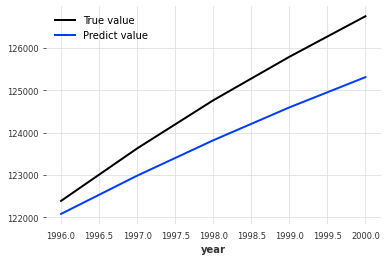

In [ ]:
E5data_true.plot(label='True value')
Arima_predic.plot(label='Predict value')

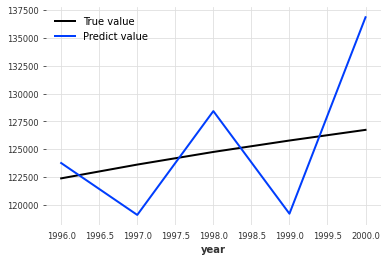

In [ ]:
E5data_true.plot(label='True value')
N_Beatsp.plot(label='Predict value')

M4 Year

In [ ]:
from darts.models import NBEATSModel

In [ ]:
M4Ydata1=TimeSeries.from_csv('M4year_train.csv',time_col='Year')

In [ ]:
N_BeatYm1=NBEATSModel(input_chunk_length=6,output_chunk_length=3)

In [ ]:
N_BeatYm1.fit(M4Ydata1)

[2022-05-12 22:21:48,388] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 3 samples.
[2022-05-12 22:21:48,388] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 3 samples.
2022-05-12 22:21:48 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 3 samples.
[2022-05-12 22:21:51,895] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-05-12 22:21:51,895] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
2022-05-12 22:21:51 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-05-12 22:21:51 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-12 22:21:51 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-12 22:21:51 pytorch_lightnin

Training: 0it [00:00, ?it/s]

In [ ]:
M4Ypred1=N_BeatYm1.predict(3)

Predicting: 1it [00:00, ?it/s]

In [ ]:
M4Ydata_true=TimeSeries.from_csv('M4year_test.csv',time_col='Year')

In [ ]:
from darts.metrics import mape

In [ ]:
mape(M4Ydata_true,M4Ypred1)

112.90512149572983

In [ ]:
!/opt/bin/nvidia-smi

Thu May 12 22:52:40 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P0    27W /  70W |   1248MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Model 2

In [ ]:
N_Beatsm2=NBEATSModel(input_chunk_length=6,output_chunk_length=3,num_blocks=3)

BlockRNN

In [ ]:
from darts.models import BlockRNNModel

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
BRNN=BlockRNNModel(input_chunk_length=6,output_chunk_length=3)

In [ ]:
BRNN.fit(M4Ydata1)

[2022-05-12 00:09:31,227] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 3 samples.
[2022-05-12 00:09:31,227] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 3 samples.
2022-05-12 00:09:31 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 3 samples.
[2022-05-12 00:09:31,257] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-05-12 00:09:31,257] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
2022-05-12 00:09:31 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-05-12 00:09:31 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2022-05-12 00:09:31 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-12 00:09:31 pytorch_lightni

Training: 0it [00:00, ?it/s]

In [ ]:
M4Ypred1=BRNN.predict(3)

Predicting: 1it [00:00, ?it/s]

In [ ]:
mape(M4Ydata2,M4Ypred1)

99.81245460444302

Month

In [ ]:
M4Mdata2=TimeSeries.from_csv('M4M_train.csv',time_col='Mon')

In [ ]:
N_Beatsm1=NBEATSModel(input_chunk_length=10,output_chunk_length=5,torch_device_str='cuda:0')

[2022-05-12 15:58:38,368] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2022-05-12 15:58:38,368] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
2022-05-

In [ ]:
N_Beatsm1.fit(M4Mdata2)

[2022-05-12 15:58:40,306] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 10 samples.
[2022-05-12 15:58:40,306] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 10 samples.
2022-05-12 15:58:40 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 10 samples.
[2022-05-12 15:58:42,190] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-05-12 15:58:42,190] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
2022-05-12 15:58:42 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-05-12 15:58:42 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: True
2022-05-12 15:58:42 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-12 15:58:42 pytorch_lightn

Training: 0it [00:00, ?it/s]

In [ ]:
M4M_pre1=N_Beatsm1.predict(5)

2022-05-12 15:59:13 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 1it [00:00, ?it/s]

In [ ]:
M4M_true=TimeSeries.from_csv('M4M_test.csv',time_col='Mon')

In [ ]:
from darts.metrics import mape
mape(M4M_true,M4M_pre1)

47.347204608386136

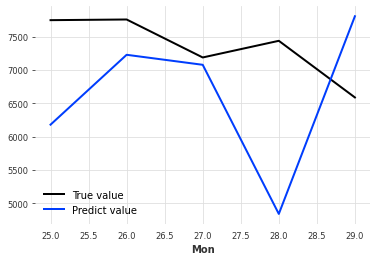

In [ ]:
M4M_true['M1'].plot(label='True value')
M4M_pre1['M1'].plot(label='Predict value')

N-Beats model 2

In [ ]:
N_Beatsm2=NBEATSModel(input_chunk_length=15,output_chunk_length=5,batch_size=64,torch_device_str='cuda:0')

[2022-05-12 15:59:32,736] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2022-05-12 15:59:32,736] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
2022-05-

In [ ]:
N_Beatsm2.fit(M4Mdata2)

[2022-05-12 15:59:32,748] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 5 samples.
[2022-05-12 15:59:32,748] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 5 samples.
2022-05-12 15:59:32 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 5 samples.
[2022-05-12 15:59:35,430] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-05-12 15:59:35,430] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
2022-05-12 15:59:35 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-05-12 15:59:35 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: True
2022-05-12 15:59:35 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-12 15:59:35 pytorch_lightning

Training: 0it [00:00, ?it/s]

In [ ]:
M4M_pre2=N_Beatsm2.predict(5)

2022-05-12 16:00:07 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 1it [00:00, ?it/s]

In [ ]:
from darts.metrics import mape
mape(M4M_true,M4M_pre2)

110.74618905294062

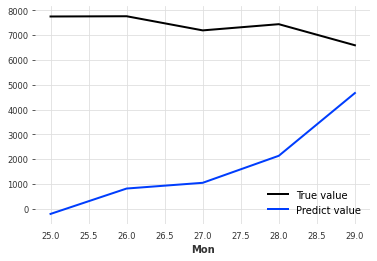

In [ ]:
M4M_true['M1'].plot(label='True value')
M4M_pre2['M1'].plot(label='Predict value')

N-Beats Model ensembling





In [ ]:
M4M_pre=(M4M_pre1+M4M_pre2)/2

In [ ]:
from darts.metrics import mape
mape(M4M_true,M4M_pre)

63.86286332851247

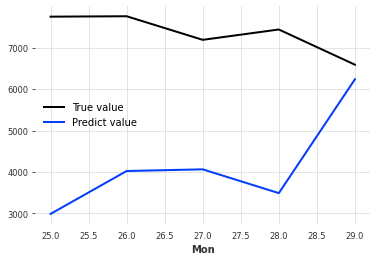

In [ ]:
M4M_true['M1'].plot(label='True value')
M4M_pre['M1'].plot(label='Predict value')

Block RNN

In [ ]:
from darts.models import BlockRNNModel

In [ ]:
BRNN=BlockRNNModel(input_chunk_length=10,output_chunk_length=5)

In [ ]:
BRNN.fit(M4Mdata2)

[2022-05-12 16:04:33,439] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 10 samples.
[2022-05-12 16:04:33,439] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 10 samples.
2022-05-12 16:04:33 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 10 samples.
[2022-05-12 16:04:33,454] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-05-12 16:04:33,454] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
2022-05-12 16:04:33 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-05-12 16:04:33 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-12 16:04:33 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-12 16:04:33 pytorch_light

Training: 0it [00:00, ?it/s]

In [ ]:
BR_pre=BRNN.predict(5)

Predicting: 1it [00:00, ?it/s]

In [ ]:
from darts.metrics import mape
mape(M4M_true,BR_pre)

99.8409141731141

M4Q Nbeat model1

In [ ]:
M4Qdata=TimeSeries.from_csv('M4Q_train.csv',time_col='Qua')

In [ ]:
N_BeatsQ1=NBEATSModel(input_chunk_length=8,output_chunk_length=4,torch_device_str='cuda:0')

[2022-05-12 17:17:23,748] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2022-05-12 17:17:23,748] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
2022-05-

In [ ]:
N_BeatsQ1.fit(M4Qdata)

[2022-05-12 17:17:26,404] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 5 samples.
[2022-05-12 17:17:26,404] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 5 samples.
2022-05-12 17:17:26 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 5 samples.
[2022-05-12 17:17:26,882] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-05-12 17:17:26,882] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
2022-05-12 17:17:26 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-05-12 17:17:26 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: True
2022-05-12 17:17:26 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-12 17:17:26 pytorch_lightning

Training: 0it [00:00, ?it/s]

In [ ]:
M4Q_pre1=N_BeatsQ1.predict(4)

2022-05-12 17:17:41 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 1it [00:00, ?it/s]

In [ ]:
M4Q_true=TimeSeries.from_csv('M4Q_test.csv',time_col='Qua')

In [ ]:
from darts.metrics import mape
mape(M4Q_true,M4Q_pre1)

13.30903010550794

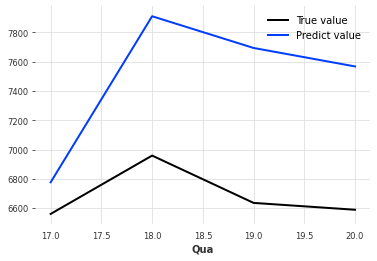

In [ ]:
M4Q_true['Q1'].plot(label='True value')
M4Q_pre1['Q1'].plot(label='Predict value')

M4Q Nbeat model2

In [ ]:
N_BeatsQ2=NBEATSModel(input_chunk_length=8,output_chunk_length=4,generic_architecture=False,num_blocks=3,torch_device_str='cuda:0')

[2022-05-12 17:09:24,205] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2022-05-12 17:09:24,205] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
2022-05-

In [ ]:
N_BeatsQ2.fit(M4Qdata)

[2022-05-12 17:09:39,603] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 5 samples.
[2022-05-12 17:09:39,603] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 5 samples.
2022-05-12 17:09:39 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 5 samples.
[2022-05-12 17:09:41,862] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-05-12 17:09:41,862] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
2022-05-12 17:09:41 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-05-12 17:09:41 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: True
2022-05-12 17:09:41 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-12 17:09:41 pytorch_lightning

Training: 0it [00:00, ?it/s]

In [ ]:
M4Q_pre2=N_BeatsQ2.predict(4)

2022-05-12 17:16:05 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 1it [00:00, ?it/s]

In [ ]:
from darts.metrics import mape
mape(M4Q_true,M4Q_pre2)

36.20358975791962

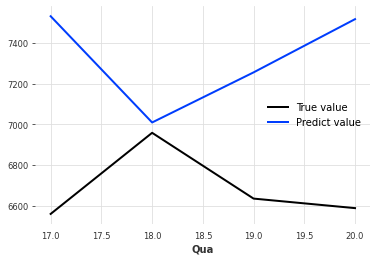

In [ ]:
M4Q_true['Q1'].plot(label='True value')
M4Q_pre2['Q1'].plot(label='Predict value')

Model 3

In [ ]:
N_BeatsQ3=NBEATSModel(input_chunk_length=12,output_chunk_length=4,generic_architecture=False,num_blocks=3,torch_device_str='cuda:0')

[2022-05-12 17:11:42,662] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
[2022-05-12 17:11:42,662] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: `torch_device_str` is deprecated and will be removed in a coming Darts version. For full support of all torch devices, use PyTorch-Lightnings trainer flags and pass them inside `pl_trainer_kwargs`. Flags of interest are {`accelerator`, `gpus`, `auto_select_gpus`, `devices`}. For more information, visit https://pytorch-lightning.readthedocs.io/en/stable/common/trainer.html#trainer-flags
2022-05-

In [ ]:
N_BeatsQ3.fit(M4Qdata)

[2022-05-12 17:16:18,722] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1 samples.
[2022-05-12 17:16:18,722] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1 samples.
2022-05-12 17:16:18 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 1 samples.
2022-05-12 17:16:18 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: True
2022-05-12 17:16:18 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-12 17:16:18 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-05-12 17:16:18 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
[2022-05-12 17:16:18,732] WARNING | darts.models.forecasting.torch_forecasting_model | Attempting to retrain the model without resuming from a checkpoint. This is currently discouraged. Consider setting `save_checkpoints` to `True` and specifying `model_

Training: 0it [00:00, ?it/s]

In [ ]:
M4Q_pre3=N_BeatsQ3.predict(4)

2022-05-12 17:16:26 pytorch_lightning.accelerators.gpu INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 1it [00:00, ?it/s]

In [ ]:
from darts.metrics import mape
mape(M4Q_true,M4Q_pre3)

111.50186038984627

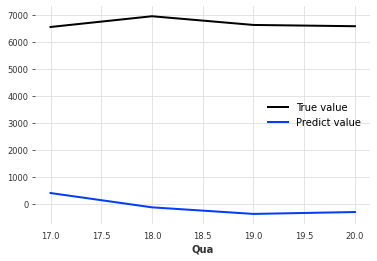

In [ ]:
M4Q_true['Q1'].plot(label='True value')
M4Q_pre3['Q1'].plot(label='Predict value')

Nbeats ensembling

In [ ]:
M4Q_pre=(M4Q_pre1+M4Q_pre2+M4Q_pre3)/3

In [ ]:
from darts.metrics import mape
mape(M4Q_true,M4Q_pre)

34.810858946971685

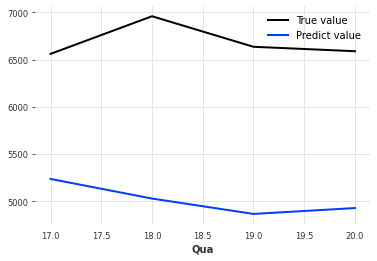

In [ ]:
M4Q_true['Q1'].plot(label='True value')
M4Q_pre['Q1'].plot(label='Predict value')

BlockRNN

In [ ]:
BRNN=BlockRNNModel(input_chunk_length=8,output_chunk_length=4)

In [ ]:
BRNN.fit(M4Qdata)

[2022-05-12 17:25:35,453] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 5 samples.
[2022-05-12 17:25:35,453] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 5 samples.
2022-05-12 17:25:35 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 5 samples.
[2022-05-12 17:25:35,460] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-05-12 17:25:35,460] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
2022-05-12 17:25:35 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-05-12 17:25:35 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-05-12 17:25:35 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-05-12 17:25:35 pytorch_lightnin

Training: 0it [00:00, ?it/s]

In [ ]:
R_pre=BRNN.predict(4)

Predicting: 1it [00:00, ?it/s]

In [ ]:
from darts.metrics import mape
mape(M4Q_true,R_pre)

99.84480598292475